# Movie Rating Predition

## 1. Importing Required Libraries

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

## 2. Data Cleaning and Processing

In [38]:
data = pd.read_csv("IMDb Movies India.csv", encoding = "iso-8859-1")

### Displaying Data

In [39]:
data.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [40]:
data.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


### Checking if there are missing values

In [42]:
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

<Axes: >

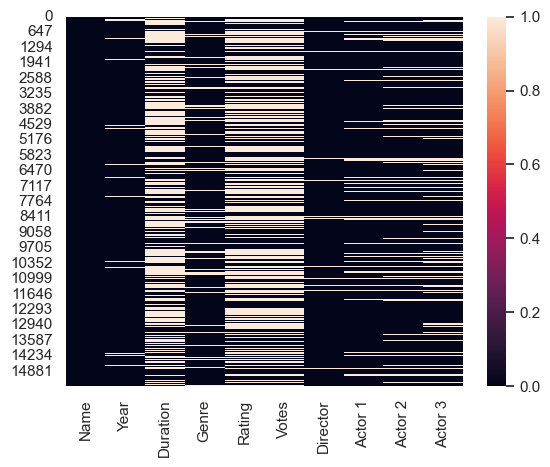

In [43]:
# Visualizing missing values.
sb.heatmap(data.isnull())

In [44]:
#Dropping duplication values.
dup_data = data.duplicated().any()
data = data.drop_duplicates()

In [45]:
#Since the target variable is rating we drop its null values.
data.dropna(subset = ['Rating'], inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7919 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7919 non-null   object 
 1   Year      7919 non-null   object 
 2   Duration  5851 non-null   object 
 3   Genre     7817 non-null   object 
 4   Rating    7919 non-null   float64
 5   Votes     7919 non-null   object 
 6   Director  7914 non-null   object 
 7   Actor 1   7794 non-null   object 
 8   Actor 2   7719 non-null   object 
 9   Actor 3   7627 non-null   object 
dtypes: float64(1), object(9)
memory usage: 680.5+ KB


In [46]:
#Dropping null value rows from Duration, Votes, and Director column.
data.dropna(subset = ['Duration', 'Votes', 'Director'], inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5850 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5850 non-null   object 
 1   Year      5850 non-null   object 
 2   Duration  5850 non-null   object 
 3   Genre     5819 non-null   object 
 4   Rating    5850 non-null   float64
 5   Votes     5850 non-null   object 
 6   Director  5850 non-null   object 
 7   Actor 1   5776 non-null   object 
 8   Actor 2   5734 non-null   object 
 9   Actor 3   5688 non-null   object 
dtypes: float64(1), object(9)
memory usage: 502.7+ KB


### Converting Objects into Integers

In [47]:
# We convert Year and Duration in strings and replace '()' and 'min' to '' respectively. Then convert into integer.
data['Year']= data['Year'].str.replace(r'[()]','', regex=True)
data['Duration']= data['Duration'].str.replace(r'min','', regex=True)
int_columns = ['Year', 'Duration']
data[int_columns] = data[int_columns].astype(int)

#Votes after 999 have ',' in them so we replace it with '' and convert into integer.
data['Votes'] = data['Votes'].str.replace(",", "").astype(int)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 5850 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5850 non-null   object 
 1   Year      5850 non-null   int32  
 2   Duration  5850 non-null   int32  
 3   Genre     5819 non-null   object 
 4   Rating    5850 non-null   float64
 5   Votes     5850 non-null   int32  
 6   Director  5850 non-null   object 
 7   Actor 1   5776 non-null   object 
 8   Actor 2   5734 non-null   object 
 9   Actor 3   5688 non-null   object 
dtypes: float64(1), int32(3), object(6)
memory usage: 434.2+ KB


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [48]:
# We drop columns Actor 2 and Actor 3.
data = data.drop(columns = ['Actor 2', 'Actor 3'])

In [49]:
# Most occuring Actor 1 and Genre in their repsective column.
print(data['Actor 1'].value_counts())
print(data['Genre'].value_counts())

Actor 1
Amitabh Bachchan      104
Mithun Chakraborty     93
Ashok Kumar            91
Dharmendra             90
Jeetendra              89
                     ... 
A.K. Hangal             1
Neera                   1
Anay                    1
Ashwin Dhar             1
Darsheel Safary         1
Name: count, Length: 2046, dtype: int64
Genre
Drama                       870
Drama, Romance              334
Action, Crime, Drama        329
Comedy, Drama               206
Action, Drama               206
                           ... 
History, Romance              1
Drama, History, Sport         1
Animation, Comedy, Drama      1
Family, Drama, Thriller       1
Romance, Musical, Drama       1
Name: count, Length: 393, dtype: int64


In [50]:
# Replacing null values with most occuring Actor 1 and Genre in their respective column.
data['Actor 1'].fillna('Amitabh Bachchan', inplace = True)
data['Genre'].fillna('Drama', inplace = True)

# Checking if there are no more missing values.
print(data.isnull().sum())

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
dtype: int64


In [51]:
data.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave
9,@Andheri,2014,116,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine
10,1:1.6 An Ode to Lost Love,2004,96,Drama,6.2,17,Madhu Ambat,Rati Agnihotri
11,1:13:7 Ek Tera Saath,2016,120,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry
12,100 Days,1991,161,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff
13,100% Love,2012,166,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet


## 3. Exploratory Data Analysis and Data Visualization

<Axes: xlabel='Year', ylabel='Count'>

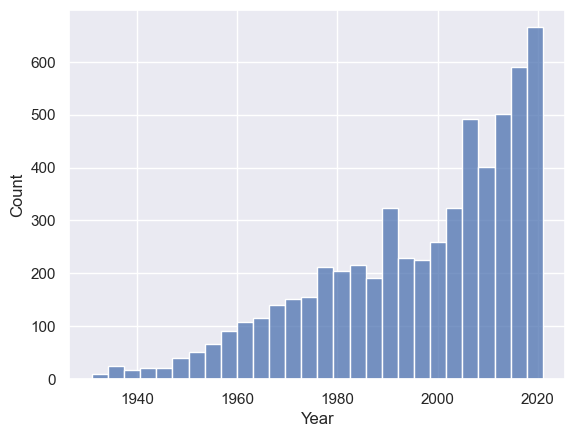

In [52]:
sb.set()
sb.histplot(x = "Year", data = data)

<Axes: xlabel='Rating', ylabel='Count'>

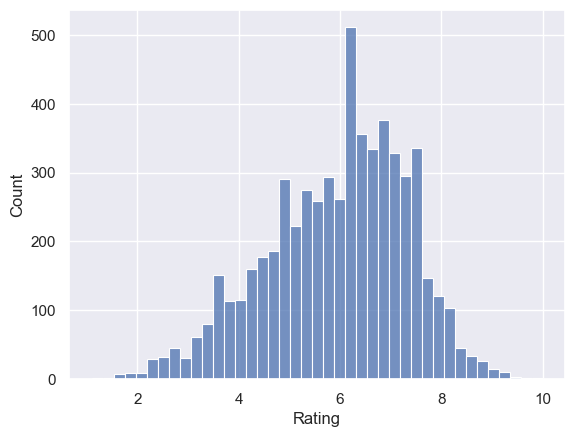

In [53]:
sb.histplot(x = "Rating", data = data)

<Axes: xlabel='Duration', ylabel='Count'>

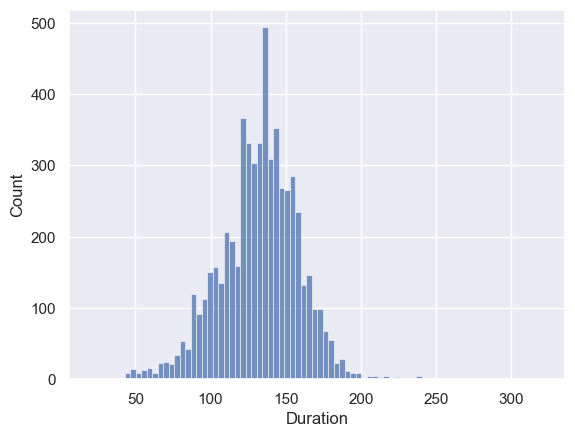

In [54]:
sb.histplot(x = "Duration", data = data)

<Axes: xlabel='Year', ylabel='Duration'>

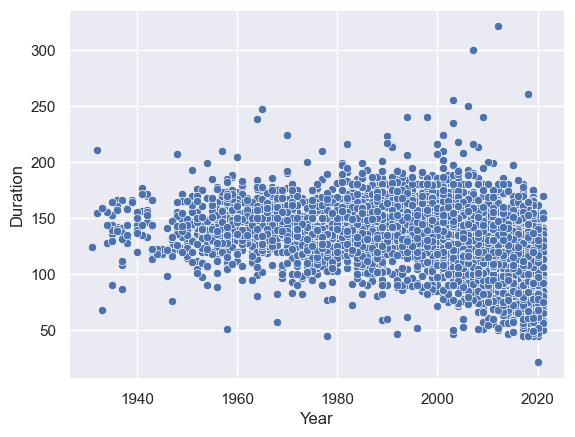

In [55]:
# We draw a year wise scatterplot of duration.
sb.scatterplot(x = "Year", y = "Duration", data = data)

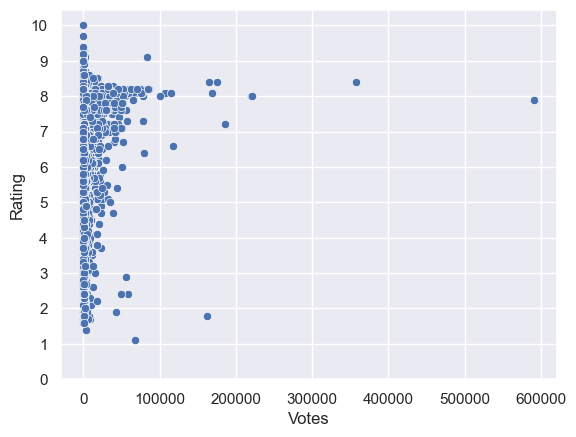

In [56]:
fig = sb.scatterplot(x = "Votes", y = "Rating", data = data)
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.show()

## 4. Splitting Dataset into Training and Testing Dataset

In [57]:
data['Genre_mean_rating'] = data.groupby('Genre')['Rating'].transform('mean')
data['Director_encoded'] = data.groupby('Director')['Rating'].transform('mean')
data['Actor_encoded'] = data.groupby('Actor 1')['Rating'].transform('mean')

In [58]:
X = data.drop(columns=['Name', 'Rating', 'Genre', 'Director', 'Actor 1'], axis=1)
y = data['Rating']

In [59]:
print(X)

       Year  Duration  Votes  Genre_mean_rating  Director_encoded  \
1      2019       109      8           6.419423          7.000000   
3      2019       110     35           5.716822          4.400000   
5      1997       147    827           6.242222          5.313333   
6      2005       142   1086           6.820000          7.383333   
8      2012        82    326           5.477778          5.600000   
...     ...       ...    ...                ...               ...   
15493  2015       115    408           6.419423          6.100000   
15494  2001       153   1496           6.950000          7.250000   
15503  1989       125     44           5.743465          6.270000   
15505  1999       129    655           5.516505          5.225000   
15508  1998       130     20           5.516505          4.171429   

       Actor_encoded  
1           6.850000  
3           5.420000  
5           4.788889  
6           5.435000  
8           5.600000  
...              ...  
15493     

In [60]:
print(y)

1        7.0
3        4.4
5        4.7
6        7.4
8        5.6
        ... 
15493    6.1
15494    6.2
15503    5.8
15505    4.5
15508    6.2
Name: Rating, Length: 5850, dtype: float64


In [61]:
# Considering 2/3rd data for training and remaining for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 16)

In [62]:
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(5850, 6) (3919, 6) (1931, 6)
(5850,) (3919,) (1931,)


## 5. Model Training

In [63]:
#Using Linear Regression
log_model = LinearRegression()

In [64]:
log_model.fit(X_train, y_train)

LinearRegression()

In [65]:
X_train_predict = log_model.predict(X_train)
print(X_train_predict)

[6.12035504 7.24110601 5.59997995 ... 7.45790303 5.29417439 5.50090648]


## 6. Prediction and Model Accuracy

In [66]:
from sklearn.metrics import mean_absolute_error
X_training_error = mean_absolute_error(y_train, X_train_predict)
print(X_training_error)

0.5197270943783941


In [67]:
train_accuracy = log_model.score(X_train, y_train)
print(train_accuracy)

0.7316180998447855


In [68]:
test_predict = log_model.predict(X_test)
print(test_predict)

[7.34728034 6.32707114 6.56301165 ... 6.94599798 6.45428536 6.42136275]


In [69]:
test_accuracy = log_model.score(X_test, y_test)
print(test_accuracy)

0.7263603383629622


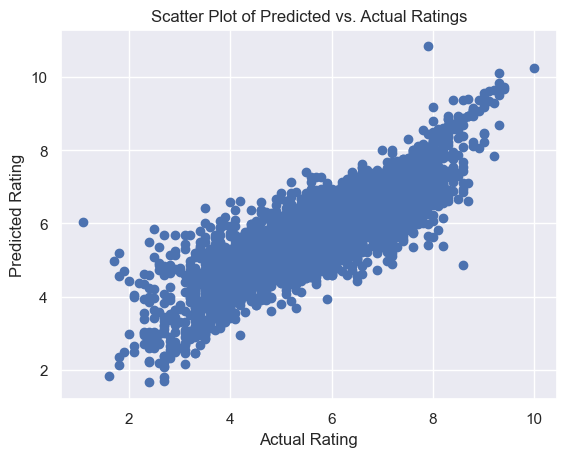

In [70]:
plt.scatter(x = y_train, y = X_train_predict)

# Add labels and title:
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Scatter Plot of Predicted vs. Actual Ratings')

# Display the plot:
# mpl.grid(True)  # Add a grid for better readability
plt.show()